## Using Tensorflow

In [3]:
import tensorflow as tf

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from pathlib import Path

In [4]:
data_path = Path('../data')

In [6]:
train_df = pd.read_csv(data_path/'landmark_ds_train.csv')
test_df = pd.read_csv(data_path/'landmark_ds_test.csv')

In [8]:
def get_landmark_features(df):
  landmark_feature_names = df.columns[:-1]
  landmark_features = df[landmark_feature_names]
  # landmark_feature_tensors = tf.convert_to_tensor(landmark_features)
  return landmark_features
# get_landmark_features(train_df)

In [9]:
landmark_features = get_landmark_features(train_df) 
targets = train_df.IS_Y.values

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(landmark_features)

In [10]:
def f1_score(precision, recall):
    return 2 * precision * recall / (precision + recall)

In [11]:
from tensorflow.keras.metrics import Precision, Recall

model = tf.keras.Sequential([
  normalizer,
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=[Precision(), Recall()])

In [12]:
history = model.fit(landmark_features, targets, epochs=10, batch_size=32, validation_split=.2)

Epoch 1/10
2888/2888 [==============================] - 3s 845us/step - loss: 0.1864 - precision: 0.7242 - recall: 0.4702 - val_loss: 0.1047 - val_precision: 0.8769 - val_recall: 0.7510
Epoch 2/10
2888/2888 [==============================] - 2s 771us/step - loss: 0.0867 - precision: 0.8896 - recall: 0.8106 - val_loss: 0.0786 - val_precision: 0.9144 - val_recall: 0.8070
Epoch 3/10
2888/2888 [==============================] - 2s 771us/step - loss: 0.0696 - precision: 0.9057 - recall: 0.8575 - val_loss: 0.0682 - val_precision: 0.9157 - val_recall: 0.8404
Epoch 4/10
2888/2888 [==============================] - 2s 784us/step - loss: 0.0628 - precision: 0.9173 - recall: 0.8753 - val_loss: 0.0634 - val_precision: 0.9384 - val_recall: 0.8395
Epoch 5/10
2888/2888 [==============================] - 3s 888us/step - loss: 0.0581 - precision: 0.9252 - recall: 0.8868 - val_loss: 0.0624 - val_precision: 0.9195 - val_recall: 0.8688
Epoch 6/10
2888/2888 [==============================] - 2s 802us/step 

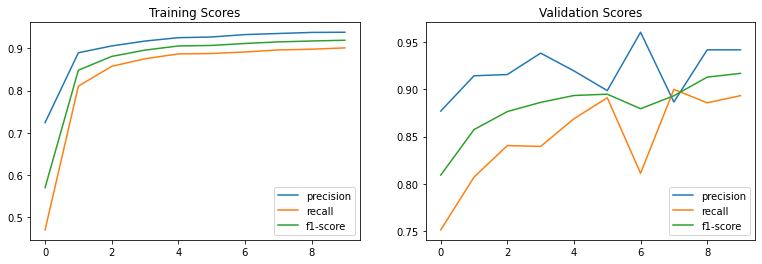

In [13]:
precision = np.array(history.history['precision'])
recall = np.array(history.history['recall'])
val_precision = np.array(history.history['val_precision'])
val_recall = np.array(history.history['val_recall'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
ax1.plot(precision)
ax1.plot(recall)
ax1.plot(f1_score(precision, recall))
ax1.legend(['precision', 'recall', 'f1-score'])
ax1.set_title("Training Scores")

ax2.plot(val_precision)
ax2.plot(val_recall)
ax2.plot(f1_score(val_precision, val_recall))
ax2.legend(['precision', 'recall', 'f1-score'])
ax2.set_title("Validation Scores")

plt.show()

In [14]:
test_loss, test_precision, test_recall = model.evaluate(get_landmark_features(test_df), test_df.IS_Y.values, verbose=2)
test_loss, test_precision, test_recall, f1_score(test_precision, test_recall)

903/903 - 0s - loss: 0.0457 - precision: 0.9353 - recall: 0.9151 - 349ms/epoch - 387us/step


(0.045723725110292435,
 0.9352940917015076,
 0.9151079058647156,
 0.9250908924118546)

In [15]:
model.save('landmark-classifier')

INFO:tensorflow:Assets written to: landmark-classifier\assets


In [13]:
# !zip -r landmark_classifier.zip landmark-classifier/